In [1]:
from Phosphorpy import DataSet
from astropy.table import Table
from astropy import units as u
import numpy as np
import os
Table.read('/Users/patrickr/Documents/temp/comb_ra_lte_180.fits')[:500].write('my_coordinates.fits', overwrite=True)

# Example
Below we give a full example on how **Phosphorpy** can be used. The example shows most of the functionality and provides an overview what **Phosphorpy** is able to do.

### Start
To start, we have to create a **DataSet**, the central object which provides the interface to the different subsections like the coordinates, magnitudes, ... . There are two ways to do this. The first one is using a file of coordinates and the second one is by starting with a constrained query of a Vizier catalog.<br>
For this example we will use a file with equatorial coordinates ('my_coordinates.fits'). The file doesn't have to be a fits-table, it can be also a csv-file (other formats are not supported at the moment). Our file has two columns, the first is named 'RAJ2000' and the second one 'DEJ2000'. By default the column names are set to 'ra' and 'dec', if the names of the columns are different we have to provide those different column names too.

In [2]:
from Phosphorpy import DataSet
ds = DataSet.load_coordinates('./my_coordinates.fits', 
                              ra_name='ra', dec_name='dec')

Now we have a **DataSet** with a set of coordinates. We can plot the positions of the coordinates. First in the equatorial system

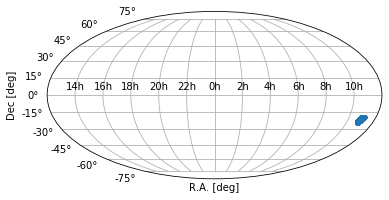

In [3]:
ds.plot.equatorial_coordinates()

or in Galactic coordinates

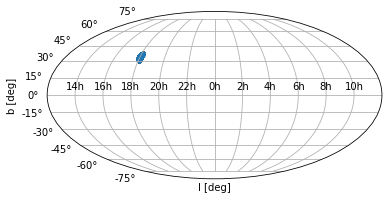

In [4]:
ds.plot.galactic_coordinates()

Often a direct access to the data is needed to performe more complex task or just task, which are not implemented. To get the coordinates in editable format, few ways are possible:
1. Access the pandas DataFrame with the data

In [5]:
ds.coordinates.data

,ra,dec,l,b
row_id,,,,
0,163.058666,-24.793418,271.298731,30.656708
1,162.550380,-24.733873,270.804326,30.468736
2,162.511061,-24.690197,270.742535,30.487378
3,163.072422,-24.690349,271.249540,30.751525
4,163.187221,-24.604381,271.302319,30.878894
...,...,...,...,...
495,164.607471,-18.899779,269.105274,36.441499
496,165.077038,-18.893144,269.573246,36.678388
497,166.259962,-18.880281,270.770875,37.259164


The DataFrame contains the equatorial and galactic coordinates in degree.
2. As an astropy Table

In [6]:
ds.coordinates.to_astropy_table()

ra,dec,l,b
float64,float64,float64,float64
163.0586660035763,-24.793417643778312,271.2987313154365,30.656708099148386
162.55038009783812,-24.73387253986402,270.8043256643904,30.468736298270418
162.5110611234598,-24.6901967241768,270.74253493818884,30.48737802111851
163.0724221772583,-24.690349432352345,271.249539843236,30.751524893538676
163.18722073038754,-24.60438053372245,271.30231870997295,30.878893510395198
163.12786070211854,-24.560940037951173,271.22235020043746,30.888423995471403
163.18870973051972,-24.53518840822035,271.26226257668134,30.9389622654175
163.36024977097438,-24.538229874587422,271.4203701203788,31.01632551341545
163.29514369989818,-24.526287711795263,271.3538729700077,30.996270898704385


3. as a list of astropy SkyCoord

In [7]:
ds.coordinates.to_sky_coord()

<SkyCoord (ICRS): (ra, dec) in deg
    [(163.058666  , -24.79341764), (162.5503801 , -24.73387254),
     (162.51106112, -24.69019672), (163.07242218, -24.69034943),
     (163.18722073, -24.60438053), (163.1278607 , -24.56094004),
     (163.18870973, -24.53518841), (163.36024977, -24.53822987),
     (163.2951437 , -24.52628771), (162.70604114, -24.52024567),
     (162.84076211, -24.50130436), (162.24794224, -24.41966382),
     (162.47879357, -24.30722248), (162.49067925, -24.25136981),
     (162.29447051, -24.22584122), (163.48690018, -24.14980088),
     (162.51197197, -24.03693969), (163.10721062, -24.03183268),
     (163.71649552, -23.92072595), (163.81489947, -23.81423123),
     (163.85677879, -23.809718  ), (163.14599509, -23.78775878),
     (163.139827  , -23.77011759), (163.81484575, -23.76231976),
     (163.85591879, -23.76533233), (163.90260069, -23.76398777),
     (163.23367673, -23.75337948), (163.88079886, -23.72177234),
     (162.29050043, -23.68585924), (162.30356689, -23.6

## photometric data
We might want more information of objects at the provided coordinates, such as magnitudes. So, we have to get them from catalogs. As is described in [magnitudes](magnitude), we use the Vizier database as source of the data. Vizier contains catalogues of most of the current surveys. <br>
We will use all available survey data: at the moment data is available from the SDSS, Pan-STARRS, KiDS, GALEX, 2MASS, VIKING, UKIDSS, Gaia and WISE surveys. We can give all the survey names in an array or call **load_from_vizier** each time for each survey individually with the respective survey name as input:

In [8]:
surveys = ['SDSS', 'Pan-STARRS', 'KiDS', 'GALEX', 
           '2MASS', 'VIKING', 'UKIDSS', 'Gaia', 'WISE']
ds.load_from_vizier(surveys)
# or alternatively:
#for s in surveys:
  #  ds.load_from_vizier(s)

Both versions give the same result. Alternatively, you can give 'all' as input parameter to **load_from_vizier**

In [9]:
#ds.load_from_vizier('all')

Another option, if just the optical data are required, you can use the key word 'optical' or if you want the NIR surveys, use 'NIR' (this keyword is not case sensitive).<br>
After the download of the survey information is finished we can take a look at the distribution of the magnitudes (note downloading the survey data can take a while if the list of coordinates is long). In the case of the coordinates, we can go via the **magnitudes** object or direct to the plotting environment.

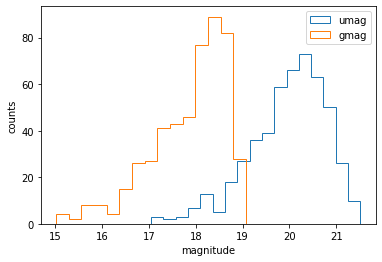

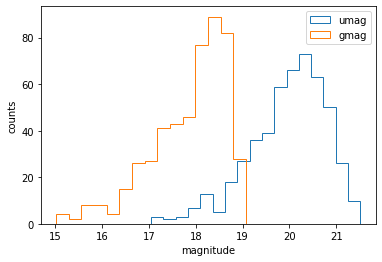

In [10]:
ds.magnitudes.plot.hist(['u', 'g'])
# or direct
ds.plot.magnitude_hist(['u', 'g'])

### Extinction
Depending on the area on the sky and on the goal of your query it might be necessary to correct the magnitudes for the effect of Galactic extinction. **Phosphorpy** is able to do that with just one call. Based on the InfraRed Science Archive (IRSA) dust map the package extinction is used to compute the extinction correction. <br>
To apply the extinction correction just do

In [11]:
ds.correct_extinction()

But keep in mind that the IRSA dust map has a resolution of a few arcminutes and therefore the extinction correction is interpolated to the coordinate of interest. Thus, especially for fields in the Galactic Plane where the extinction may well vary over angular scales less than a few arcminutes, the extinction correction is approximated. Also, it is important to mention that the extinction correction will overwrite the original data of the magnitudes!

### Colors
After obtaining the magnitudes for all objects in our search, the logical next step is to investigate their colors. <br>
**Phosphorpy** has therefore a system to compute the colors. <br>
The easiest way to compute the colors of all downloaded surveys is by calling the colors variable in the following way:

In [12]:
ds.colors

Actually, it is not necessary to do this explicitly. **Phosphorpy** will compute the colors on the fly if the command ds.colors is part of a longer command. For example if you want to display a color-color diagram using the 2MASS survey, one can write directly:

<Figure size 432x288 with 0 Axes>

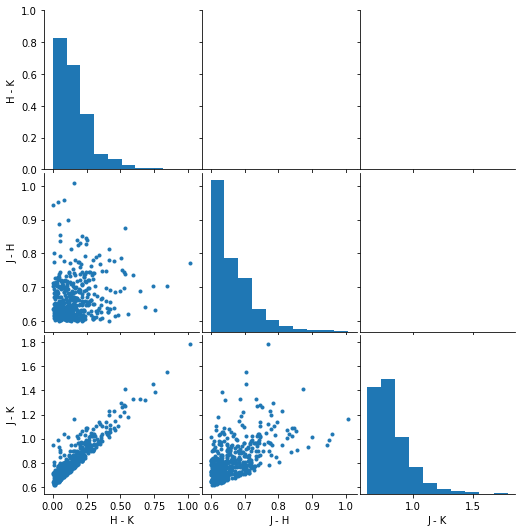

In [13]:
ds.colors.plot.color_color('2mass')

Besides the actual use of colors to identify the object, colors can also be used to detect outliers in the data. An outlier is an object, whose colors are not in or close to the majority of the astrophysical objects (see [outlier detection](outlier-detection) for more details). To let **Phosphorpy** find the outliers you have to call the method **outlier_detection**

Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]

[500 rows x 0 columns]
1      True
2      True
3      True
4      True
5      True
       ... 
496    True
497    True
498    True
499    True
500    True
Length: 500, dtype: bool


<Figure size 432x288 with 0 Axes>

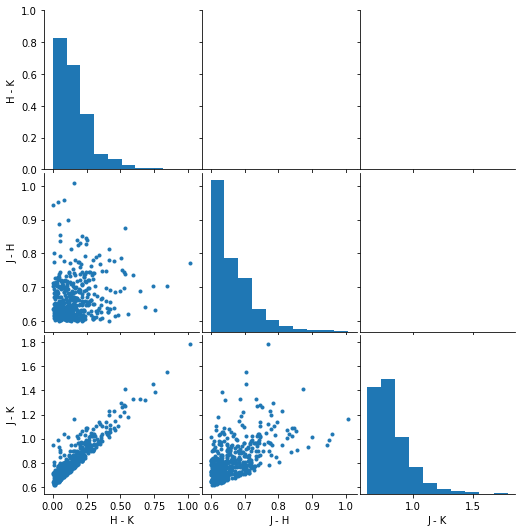

In [14]:
ds.colors.outlier_detection('2mass')
ds.colors.plot.color_color('2mass')

### Flux and SED
Like colors, fluxes can be useful for many purposes. Therefore **Phosphorpy** includes also an automatic system to compute the fluxes of the implemented surveys and as before, it uses a basic plotting environment. <br>
To compute the fluxes, you have to do the same as in the case of colors. Just call:

In [15]:
ds.flux

The flux environment has a fitting system. For instance, if we want to fit the data with a 4th order polynomial one types:

In [16]:
ds.flux.fit_polynomial(4)

,a,b,c,d,e
1,-2.058935e-33,2.006661e-28,-6.163463e-24,5.945365e-20,-1.727850e-17
2,-4.114225e-33,3.937976e-28,-1.163267e-23,9.866433e-20,1.441690e-16
3,-2.074506e-34,3.865816e-29,-2.061809e-24,3.271778e-20,2.788534e-17
4,-1.175375e-32,1.158794e-27,-3.647557e-23,3.790177e-19,-4.782281e-16
5,-3.332175e-33,3.152321e-28,-9.081054e-24,7.044745e-20,1.923188e-16
...,...,...,...,...,...
495,-2.035972e-32,1.984829e-27,-6.129617e-23,6.132786e-19,-6.541869e-16
496,-3.361430e-33,3.343327e-28,-1.062682e-23,1.098923e-19,-7.735303e-17
497,-2.083611e-32,2.088259e-27,-6.743921e-23,7.303667e-19,-9.637294e-16
498,-1.326033e-32,1.315442e-27,-4.164400e-23,4.278544e-19,-2.928259e-16


The results of the fit can be then obtained via

In [17]:
fitting_results = ds.flux.fit

The plotting environment of the flux section provides only one plot at the moment. This is a plot of the spectral energy distribution (SED). To plot the SED with the number 4, you have to write

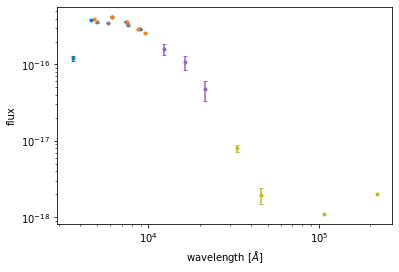

In [18]:
ds.flux.plot.sed(4, x_log=True, y_log=True)

and **Phosphorpy** will create an SED plot with logarithmic x- and y-axis.

### Astrometry
As the last big data block, **Phosphorpy** provides an interface to [Gaia DR2](https://www.cosmos.esa.int/web/gaia/dr2) and its five-parameter astrometric solution for 1.3 billion detections.

With the motivation to keep everything as simple as possible, the current data can be extended with Gaia's astrometric data by

In [19]:
ds.astrometry

One of the important information in Gaia DR2 is the proper motion of the detections. Often it a quick view can help to see, if data are in expected range or not. Therefore **Phosphorpy** provides a simple plot of the proper motions.

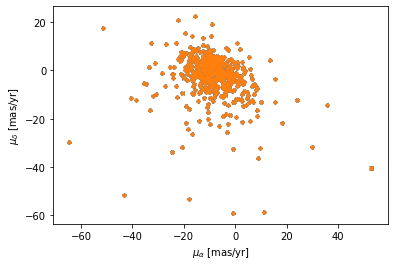

In [20]:
ds.astrometry.plot.proper_motion()

Note, that this are not the declination corrected proper motion $\mu_\alpha$. If the corrected proper motion $\mu_\alpha^*$ is required, then

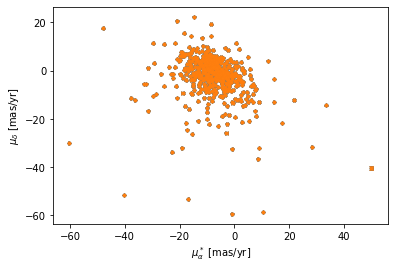

In [21]:
ds.astrometry.plot.proper_motion(cos_correction=True)

The second important part of Gaia is the parallax. Also the parallax can be plotted in a simple way

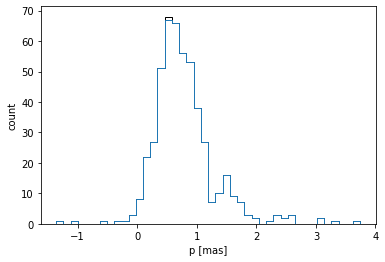

In [22]:
ds.astrometry.plot.parallax_hist()

or in combination with the uncertainties

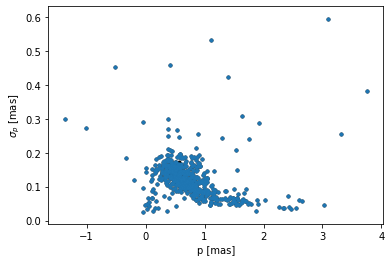

In [23]:
ds.astrometry.plot.parallax()

### Additional data
Besides the data from the major astronomical catalogs, there are many other catalogues available, which can be useful if they are connected to an existing data set. At the moment **Phosphorpy** is not able to connect many catalogues if they are not available in Vizier (see [external data](additional-data) for details) but three additional data sources are implemented. <br>
The first two external catalogues are those providing images from SDSS and Pan-STARRS. As before, the interface to get the image(s) is simple: one has to call one of two methods to download them. The call to download a single image from SDSS or Pan-STARRS is **images** and the second command to download all images / the images of all coordinates in the input list from SDSS or Pan-STARRS is **all_images** <br>
As inputs the survey name, the id of the coordinates are required (if the method is **images**), and the directory to store the image are required.

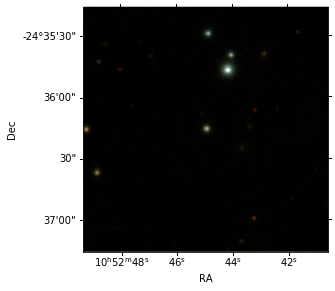

In [24]:
ds.images('PS', 4, './images')
# or if all images are wanted
#ds.all_images('PS', './images')

The other external source of data available is the [Catalina Sky Survey](http://nesssi.cacr.caltech.edu/DataRelease/), which may provide well sampled light curves for selected sources.

In [25]:
ds.light_curves

Number of light curves: 500
with 148631 entries.

Keep in mind that both queries take much more time to run than the average catalog query. Especially in the case of many sources it can take a while before all the data is downloaded. This has nothing to do with **Phosphorpy**, it is because of server response.